# HW 1
## Machine Learning with Python IDS-594 
### Due date: 6:00 pm 09/20/2019

In this homework you will do a classification task. You will build a model that predicts whether a person has heart disease or not. While doing this homework you will learn: <br> 1) how to pre-process the data <br> 2) perform model selection (which algorithm should you use for building your model, logistic regression or k-nearest neighbor?)  <br>3) perform hyperparameter selection (what value of K should you use in yourk-nearest neighbor algorithm) <br>After you selected the best model via cross validation, you will apply your model to the test set and report your performance to me.

Refer to Python's documentation for each function to see the input arguments, outputs, and methods.

The inputs of this homework are heart_disease.xlsx which contains the data, and heart.doc which contains some information regarding each feature (columns in the heart_disease.xlsx file)

##### Fill in the cells that have "TO DO", and give me your output scores and answer any questions I asked in the problems in a report.

In [92]:
# Import the important packages here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Problem 1) Cleaning data and visualization

In [193]:
# Use pandas.read_excel to read the heart_disease.xlsx file into a dataframe called data

excel = '/Users/karan/Downloads/heart_disease.xlsx'
data=pd.read_excel(excel)
data.shape

(270, 14)

In [94]:
df1=data   # temporary data frame for analysis

In [95]:
# Look at the first 5 rows by using head(5)
df1.head()

,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [96]:
# Get the statistics of your dataframe
# statistical analysis for numerical variables (mean,median,std,max,min, etc.)
df1.describe()

,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [97]:
# Are there any columns that contain a missing value? If yes, substitute those with the mean value of each column!
df1.isna().sum().sort_values(ascending=False)
# No missing values are found in the dataset #

heart_disease    0
thal             0
vessel_num       0
slope            0
oldpeak          0
angia            0
heart_rate       0
ecg              0
blood_sugar      0
chol             0
bp               0
chest_pain       0
sex              0
age              0
dtype: int64

In [98]:
# To check disease Frequency for chest pain level
# we need to first check the data types of variables in the data frame 
# which are categorical and which are not

df1.dtypes


# here we found that every variable is integer , hence we need to change some variables to categorical (factor)

age                int64
sex                int64
chest_pain         int64
bp                 int64
chol               int64
blood_sugar        int64
ecg                int64
heart_rate         int64
angia              int64
oldpeak          float64
slope              int64
vessel_num         int64
thal               int64
heart_disease      int64
dtype: object

In [99]:
# Data Visualization to find the relationship of heart disease with other variables

Text(0, 0.5, 'frequency of disease')

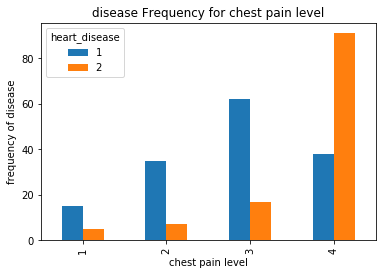

In [100]:
# Look at the disease Frequency for chest pain level (do this for other categorical variables to see if they are useful features)
%matplotlib inline
pd.crosstab(df1.chest_pain,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for chest pain level')
plt.xlabel('chest pain level')
plt.ylabel('frequency of disease')


Text(0, 0.5, 'frequency of disease')

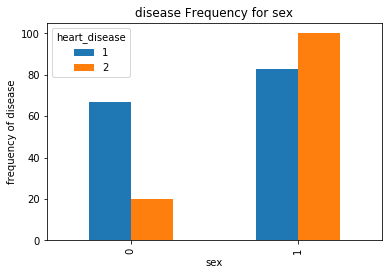

In [101]:
%matplotlib inline
pd.crosstab(df1.sex,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for sex')
plt.xlabel('sex')
plt.ylabel('frequency of disease')
### for sex 1, maximum heart disease is present  

Text(0, 0.5, 'frequency of disease')

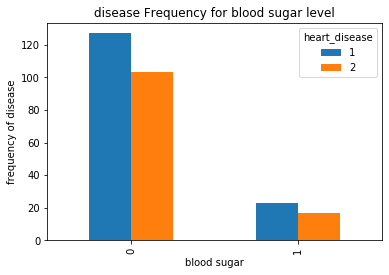

In [102]:
%matplotlib inline
pd.crosstab(df1.blood_sugar,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for blood sugar level')
plt.xlabel('blood sugar')
plt.ylabel('frequency of disease')
### most population has blood sugar level 0 

Text(0, 0.5, 'frequency of disease')

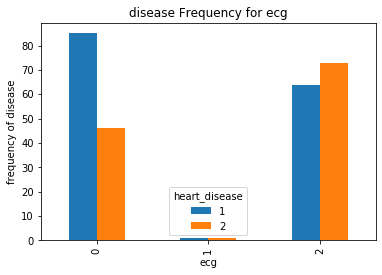

In [103]:
%matplotlib inline
pd.crosstab(df1.ecg,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for ecg')
plt.xlabel('ecg')
plt.ylabel('frequency of disease')
### most population with ECG 0 do not have heart disease while population with ECG 2 have more heart disease.

Text(0, 0.5, 'frequency of disease')

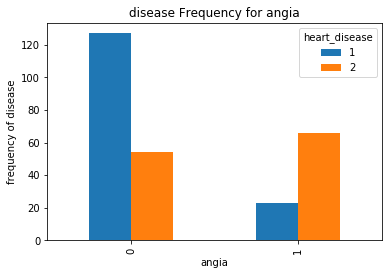

In [104]:
%matplotlib inline
pd.crosstab(df1.angia,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for angia')
plt.xlabel('angia')
plt.ylabel('frequency of disease')
### the dominating angia 0 have more people with no heart disease while out of the population who have angia 1

Text(0, 0.5, 'frequency of disease')

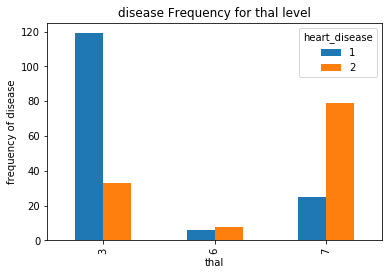

In [105]:
%matplotlib inline
pd.crosstab(df1.thal,df1.heart_disease).plot(kind='bar')
plt.title('disease Frequency for thal level')
plt.xlabel('thal')
plt.ylabel('frequency of disease')
### people who have thal level 3 are less likely to have a heart disease but people who have thal 7 have more chances to have a heart disease.

In [106]:
# Use pandas.get_dummies and put the column names for the categorical variables (refer to the documentation to find which columns are categorical variables). 
# This will create a dummy variable for each level of categories.
# TO DO
data = ...
# Create a set of dummy variables from the Cat variables
df1_sex = pd.get_dummies(df1['sex'])
df1_sex = df1_sex.rename(columns = {0:"Female", 1:"Male"}) 
df1_chestpain = pd.get_dummies(df1['chest_pain'])
df1_chestpain = df1_chestpain.rename(columns = {1:"CP1", 2:"CP2", 3:"CP3", 4:"CP4"}) 
df1_bloodsugar = pd.get_dummies(df1['blood_sugar'])
df1_bloodsugar = df1_bloodsugar.rename( columns = {0:"Blood Sugar Level 1", 1:"Blood Sugar Level 2"})
df1_ecg = pd.get_dummies(df1['ecg'])
df1_ecg = df1_ecg.rename(columns = {0:"ECG 0", 1:"ECG 1", 2:"ECG 2"}) 
df1_angia = pd.get_dummies(df1['angia'])
df1_angia = df1_angia.rename(columns = {0:"Angia 0 ", 1:"Angia 1"}) 
df1_thal = pd.get_dummies(df1['thal'])
df1_thal = df1_thal.rename(columns = {3:"Thal 3", 6:"Thal 6", 7:"Thal 7"}) 


In [107]:
df1_new = pd.concat([df1, df1_sex,df1_chestpain, df1_bloodsugar,df1_ecg,df1_angia, df1_thal], axis=1)
#del df1_new['chest_pain','blood_sguar','sex','ecg','angia','thal']
df1_new = df1_new.drop(['chest_pain','blood_sugar','sex','ecg','angia','thal'], 1)

In [108]:
df1_new.head()

,age,bp,chol,heart_rate,oldpeak,slope,vessel_num,heart_disease,Female,Male,...,Blood Sugar Level 1,Blood Sugar Level 2,ECG 0,ECG 1,ECG 2,Angia 0,Angia 1,Thal 3,Thal 6,Thal 7
0,70,130,322,109,2.4,2,3,2,0,1,...,1,0,0,0,1,1,0,1,0,0
1,67,115,564,160,1.6,2,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1
2,57,124,261,141,0.3,1,0,2,0,1,...,1,0,1,0,0,1,0,0,0,1
3,64,128,263,105,0.2,2,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
4,74,120,269,121,0.2,1,1,1,1,0,...,1,0,0,0,1,0,1,1,0,0


In [109]:
# What is number of classes disease/not_disease?
df1_new['heart_disease'].value_counts()

# 150 has absence of heart disease while 120 has heart disease

1    150
2    120
Name: heart_disease, dtype: int64

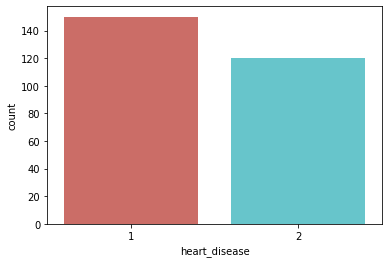

In [110]:
import seaborn as sns
sns.countplot(x='heart_disease', data=df1_new, palette='hls')
plt.show()

In [111]:
# Get your class labels in a variable called y, and remove it from your dataframe . 
# Now, data contains your samples and features, and y contains your labels
y = df1_new['heart_disease']
df1_new.drop('heart_disease', axis=1, inplace=True)

In [177]:
np.random.seed(999)

# Split the data into a train and validation set. You won't touch the test set until the very end of this program. 
# Perform any analysis (model selection, hyperparameter selection) on your training data (X_train_outer)
# DO NOT TOUCH X_test UNTIL THE END OF THIS PROGRAM!!!!
from sklearn.model_selection import train_test_split
X_train_outer, X_test, y_train_outer, y_test = train_test_split(df1_new, y, test_size=0.2)
print (X_train_outer.shape, y_train_outer.shape)
print (X_test.shape, y_test.shape)

(216, 23) (216,)
(54, 23) (54,)


### Problem 2) Classification using nearest neighbor classifier, and see overfitting and underfitting by changing the value of n_neighbors (vary it from 1 to the number of samples -- len(X_train_inner)) What is the accuracy on training and validation when k=1? What about k=len(X_train_inner) ? When underfitting happens when overfitting?

In [178]:
# Split X_train_outer again into X_train_inner, X_val, y_train_inner, y_val (We have an inner training set, and the validation set)
X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train_outer, y_train_outer, test_size=0.2)
print (X_train_inner.shape, y_train_inner.shape)
print (X_val.shape, y_val.shape)

(172, 23) (172,)
(44, 23) (44,)


In [179]:
# Standardize the training set, and then apply the transformation values to the val set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_inner)
X_train_inner_std = scaler.transform(X_train_inner)
X_val_std  = scaler.transform(X_val)

In [180]:
# Fit a K-nearest neighbor classifier model to X_train_inner_std data --> Change the value of n_neighbors here and report the accuracies you get
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=172)
classifier.fit(X_train_inner_std, y_train_inner)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=172, p=2,
                     weights='uniform')

In [181]:
print(len((X_train_inner)))

172


In [182]:
# Print accuracy on your validation data (X_val_std)
classifier.score(X_val_std,y_val)

0.5

In [183]:
# Print accuracy on your training data (X_train_inner_std)
classifier.score(X_train_inner_std,y_train_inner)

0.5755813953488372

### Problem 3) So, how to find best k? Perform 10-fold Cross-validation on your train set to find the best value of k for nearest neighbor classifier (you can also find it by trying different values on the hold-out set you defined above, but since the dataset is small, it is better to perform 10-fold cross-validation, why? because you may by chance get a hold-out validation set that works well with k=1! you never know! So, do it on 10 different val sets and average them to make sure you got a good k!

In [184]:
# In each fold of your cross validation, your training fold needs to be first standardized (scaled), then an algorithm be fit
# Then the same transformation will be applied to each validation fold
# This is done by pipeline and is extremely useful when you use GridSearchCV or cross_val_score and etc..
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
clf = KNeighborsClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])

In [185]:
# param_candidate defines the set of hyperparameters that you want your function to analyze
from sklearn.model_selection import GridSearchCV
param_candidate = [{'estimator__n_neighbors': np.arange(1, 172)}]

In [186]:
# Create a classifier object with GridSearchCV and param_candidate and fit the GridSearchCV object with X_train_outer, and y_train_outer 
# Read Python's documentation if anything is unclear!
# TO DO
clf = GridSearchCV(pipeline, param_grid=param_candidate, cv=10)

clf.fit(X_train_outer,y_train_outer)

/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                               

In [187]:
# print clf.best_score_ (refer to Python's documentation for the attributes of clf)
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.8379629629629629


In [188]:
# View the best parameters for the model found using grid search
print('Best k:',clf.best_params_) 

Best k: {'estimator__n_neighbors': 24}


### Problem 4) Perform logistic regression with the default value of C=1, and obtain the cross-validation performance

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



In [190]:
# Do standardization before classification using Pipeline as 
# Problem 3. You don't need any param_candidate in this case.
steps = [('scaler', StandardScaler()), ('logclf', LogisticRegression(C=1))]
pipeline = Pipeline(steps)

In [191]:
# Use the cross_val_score on logistic regression on X_train_outer and y_train_outer with cv=10 and get scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline,X_train_outer,y_train_outer,cv=10)
print(scores)

[0.73913043 0.77272727 0.86363636 0.90909091 1.         0.71428571
 0.66666667 0.80952381 0.9047619  0.85714286]


/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [126]:
scores.mean()

0.8236965932618107

### Problem 5) Cross-validation performance of which algorithm was better? K-nearest neighbor or logistic regression? You will pick the one that gave you the highest performance (accuracy), and train your model using all training data, test it on your test set (which you never touched up until this point), get your performance, and report it (to me, to the doctor, or the hospital as the generalization performance of your model)

In [127]:
# Standardize the training set (X_train_outer), and then apply the transformation values to the test set (X_test)
# TO DO
scaler = StandardScaler().fit(X_train_outer)
X_train_outer_std = scaler.transform(X_train_outer)
X_test_std = scaler.transform(X_test)

In [150]:
# Fit the best algorithm to X_train_outer_std, y_train_outer
# TO DO


clf = KNeighborsClassifier(n_neighbors=24)


clf.fit(X_train_outer_std,y_train_outer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [151]:
# Test on your test set X_test_std, and report accuracy_score
clf.predict(X_test_std)

array([2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1])

In [152]:
clf.score(X_test_std,y_test)

0.8518518518518519

In [131]:
# Accuracy is high when we use  KNN as compared to Logistic Regression 

In [ ]:
#---------********************** End *************************************************--------#